In [1]:
%matplotlib inline


# Подбор параметров RandomForest с помощью Out of Band Score

[(1, 252), (0, 248)]
(500, 25)


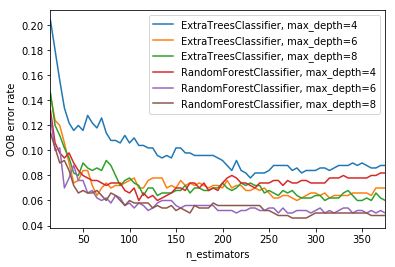

In [10]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

RANDOM_STATE = 123

# Создаем синтетический датасет
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

print(Counter(y).most_common())
print(X.shape)

# Устанавливаем аргумент warm_start=True для дообучения модели
ensemble_clfs = [
   ("ExtraTreesClassifier, max_depth=4",
        ExtraTreesClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               max_depth=4,
                               random_state=RANDOM_STATE,
                               bootstrap=True)),
    ("ExtraTreesClassifier, max_depth=6",
        ExtraTreesClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               max_depth=6,
                               random_state=RANDOM_STATE,
                               bootstrap=True)),
      ("ExtraTreesClassifier, max_depth=8",
        ExtraTreesClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               max_depth=8,
                               random_state=RANDOM_STATE,
                               bootstrap=True)),
    ("RandomForestClassifier, max_depth=4",
        RandomForestClassifier(warm_start=True, max_features="sqrt",
                               oob_score=True,
                               max_depth=4,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_depth=6",
        RandomForestClassifier(warm_start=True, max_features="sqrt",
                               oob_score=True,
                               max_depth=6,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_depth=8",
        RandomForestClassifier(warm_start=True, max_features="sqrt",
                               oob_score=True,
                               max_depth=8,
                               random_state=RANDOM_STATE))
]

# Создаем переменную для сохранения оценки качества на каждой итерации
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Диапазон значений числа базовых деревьев
min_estimators = 15
max_estimators = 375

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        # Задаем число 
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Сохраняем результат
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Выводим зависимость качества от числа базовых моделей
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()